# 1. Load Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [15]:
os.getcwd()

'/Users/alejandrovillanuevalledo/Documents/GitHub/Churn-prediction/Notebook'

# 2. Load and visualize data

In [16]:
energy_supplier = pd.read_csv('/Users/alejandrovillanuevalledo/Documents/GitHub/Churn-prediction/Dataset/churn_prediction.csv')

In [17]:
energy_supplier.head()

,Customer_ID,Gender,Age,Income,Relation_length,Contract_length,Start_channel,Email_list,Home_age,Home_label,Electricity_usage,Gas_usage,Province,Churn
0,1,0,37,2371,50,0,Online,1,17,F,2238,1425,Noord-Brabant,1
1,2,1,49,4534,22,0,Online,0,11,E,3306,1651,Noord-Holland,1
2,3,1,53,5279,67,7,Online,1,31,E,2664,1176,Gelderland,0
3,4,1,40,4404,40,0,Online,1,12,D,2870,1899,Zuid-Holland,1
4,5,1,70,2144,74,31,Online,1,28,F,2983,1120,Noord-Brabant,1


No null values
Number of duplicates: 0


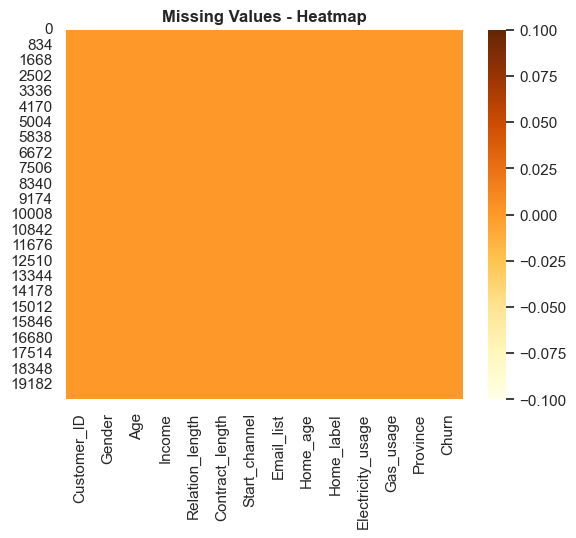

In [18]:
#missing values heatmap
nulls = energy_supplier.isnull().sum()
sns.set(rc={'figure.facecolor':'none'}) #set background to be transparent
sns.heatmap(energy_supplier.isnull(), cmap='YlOrBr')
plt.title('Missing Values - Heatmap', fontweight='bold')

#we print the missing values per column if there are missing values, or no null values otherwise
if nulls.any() > 0 :
    print(nulls)
else:
    print('No null values')

#We check for duplicated rows 
print('Number of duplicates:',energy_supplier.duplicated().sum())


The dataset has no missing values or duplicates

In [19]:
energy_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_ID        20000 non-null  int64 
 1   Gender             20000 non-null  int64 
 2   Age                20000 non-null  int64 
 3   Income             20000 non-null  int64 
 4   Relation_length    20000 non-null  int64 
 5   Contract_length    20000 non-null  int64 
 6   Start_channel      20000 non-null  object
 7   Email_list         20000 non-null  int64 
 8   Home_age           20000 non-null  int64 
 9   Home_label         20000 non-null  object
 10  Electricity_usage  20000 non-null  int64 
 11  Gas_usage          20000 non-null  int64 
 12  Province           20000 non-null  object
 13  Churn              20000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


In [20]:
#print number of unique values and the variable type per column 
for column in energy_supplier:
    print(column,':')
    print(energy_supplier[column].nunique(),',', energy_supplier[column].dtype)

Customer_ID :
20000 , int64
Gender :
2 , int64
Age :
88 , int64
Income :
8098 , int64
Relation_length :
226 , int64
Contract_length :
37 , int64
Start_channel :
2 , object
Email_list :
2 , int64
Home_age :
201 , int64
Home_label :
7 , object
Electricity_usage :
2840 , int64
Gas_usage :
2565 , int64
Province :
12 , object
Churn :
2 , int64


# 3. Data Cleaning and Preprocessing

## 3.1 Column formatting and Data transformation

In [21]:
#lowercase the column names
energy_supplier.columns = energy_supplier.columns.str.lower()

In [109]:
#turn categorical variables categorical 
energy_supplier['gender']= energy_supplier['gender'].astype('category')
energy_supplier['start_channel']= energy_supplier['start_channel'].astype('category')
energy_supplier['email_list']= energy_supplier['email_list'].astype('category')
energy_supplier['home_label']= energy_supplier['home_label'].astype('category')
energy_supplier['province']= energy_supplier['province'].astype('category')

Income is given in monthly €, when modelling the effect of 1€ increase in income might be hard to interpret or be insignificant, however, percentual changes in income could make more sense on churn effect. We create a new variable 'log_income' to determine whether single euro units or percentage changes are more significant in predicting customer churn.

In [108]:
#we create log of income
energy_supplier['log_income'] = np.log(energy_supplier['income'])

## 3.2 Dealing with Outliers

Dataframe subset creation with metric variables, we log transformed them to equalize variances, useful when comparing variables with different scales

In [23]:
num_variables_df = np.log(energy_supplier.select_dtypes(include=['int64', 'float64']).drop(columns= ['customer_id','churn']))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


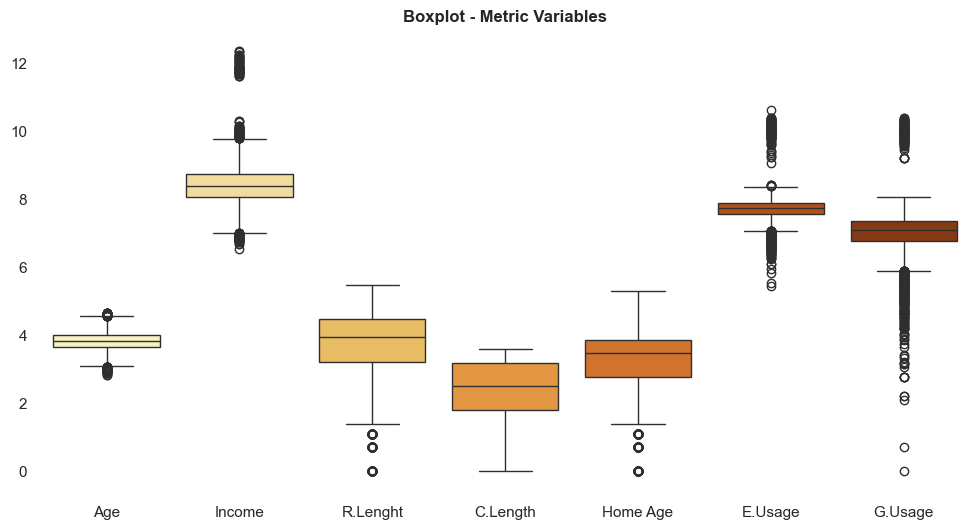

In [24]:
#Boxplots to detect outliers
plt.figure(figsize= (12,6))
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
sns.boxplot(num_variables_df, palette='YlOrBr')
plt.title('Boxplot - Metric Variables', fontweight = 'bold')
plt.xticks(np.arange(0,7), ['Age','Income','R.Lenght','C.Length', 'Home Age', 'E.Usage','G.Usage'])
plt.gca().set_facecolor('none')#set boxplot background to be transparent

Income, electricity usage and gas usage have the larger number of outliers, aditionally, we can also see sudden jump in all three variables in the upper quartile. Let's study this in more depth. 

### 3.2.1 Income Outliers

Axes(0.125,0.11;0.775x0.77)


/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_11987/774015112.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  print(sns.boxplot(energy_supplier['income'], palette='YlOrBr'))


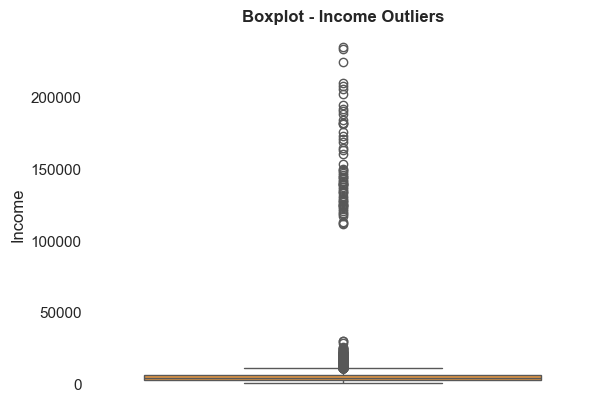

In [25]:
print(sns.boxplot(energy_supplier['income'], palette='YlOrBr'))
plt.ylabel('Income')
plt.title('Boxplot - Income Outliers', fontweight = 'bold')
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
plt.gca().set_facecolor('none')#set boxplot background to be transparent



In [26]:
#This function detects outliers in a given column and returns a list of outliers
def upper_outliers (column_data):
    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    upper_outliers = [x for x in column_data if x > upper_bound]
    
    return sorted(upper_outliers)

outliers_income = upper_outliers(energy_supplier['income'])

In [27]:
for x in outliers_income:
    if  30000 < x < 150000:
        print(x)

30042
112130
112580
113020
117240
118980
119850
121160
122420
123600
124510
124810
124970
125680
127110
128160
128710
130080
131260
133500
134400
134900
136500
137550
139380
139480
139960
139990
141260
142250
143020
144410
144810
146170
147720
149120
149700


A steep increase can be seen in income above 30042€, the income variable is indicative of a customers monthly income. It is believed that the odd numbers come from customers inputting their yearly income instead. To fix it outliers above 50000€ will be divided by 12 to achieve monthly income.

In [28]:
#Lambda function to substitute outliers in income
energy_supplier['income'] = energy_supplier['income'].apply(lambda x: x / 12 if x > 50000 else x)

In [29]:
'''
energy_supplier['income'] = np.where(energy_supplier['income'] > 50000,
                                     energy_supplier['income'] / 12,
                                     energy_supplier['income']
'''

"\nenergy_supplier['income'] = np.where(energy_supplier['income'] > 50000,\n                                     energy_supplier['income'] / 12,\n                                     energy_supplier['income']\n"

### 3.2.2 Electricity and Gas Outliers

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_11987/2531955968.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(energy_supplier['electricity_usage'], palette='YlOrBr')


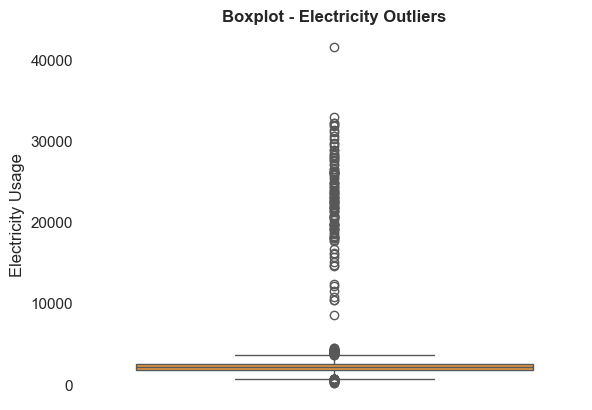

In [30]:
sns.boxplot(energy_supplier['electricity_usage'], palette='YlOrBr')
plt.ylabel('Electricity Usage')
plt.title('Boxplot - Electricity Outliers', fontweight = 'bold')
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
plt.gca().set_facecolor('none')#set boxplot background to be transparent


Axes(0.125,0.11;0.775x0.77)


/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_11987/2985231054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  print(sns.boxplot(energy_supplier['gas_usage'], palette='YlOrBr'))


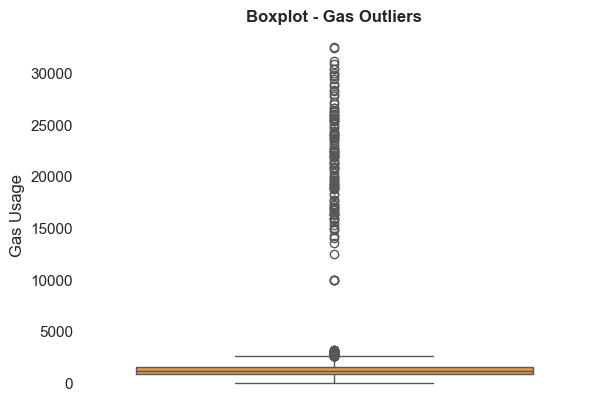

In [31]:
print(sns.boxplot(energy_supplier['gas_usage'], palette='YlOrBr'))
plt.ylabel('Gas Usage')
plt.title('Boxplot - Gas Outliers', fontweight = 'bold')
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
plt.gca().set_facecolor('none')#set boxplot background to be transparent

In [32]:
#The jump is found at 8610 KWh per year and 3209 cubic meters per year
outliers_eusage = upper_outliers(energy_supplier['electricity_usage'])
outliers_gas = upper_outliers(energy_supplier['gas_usage'])

For both electricity usage and gas usage the outlier can be due to a misreading of the consumption meters, mistakinly adding an extra 0 at the end of the level of consumption. Outliers in both variables will be divided by 10. 

In [33]:
energy_supplier['electricity_usage'] = energy_supplier['electricity_usage'].apply(lambda x: x / 10 if x > 8610 else x)
energy_supplier['gas_usage'] = energy_supplier['gas_usage'].apply(lambda x: x / 10 if x > 5000 else x)

# 4. Exploratory Data Analysis

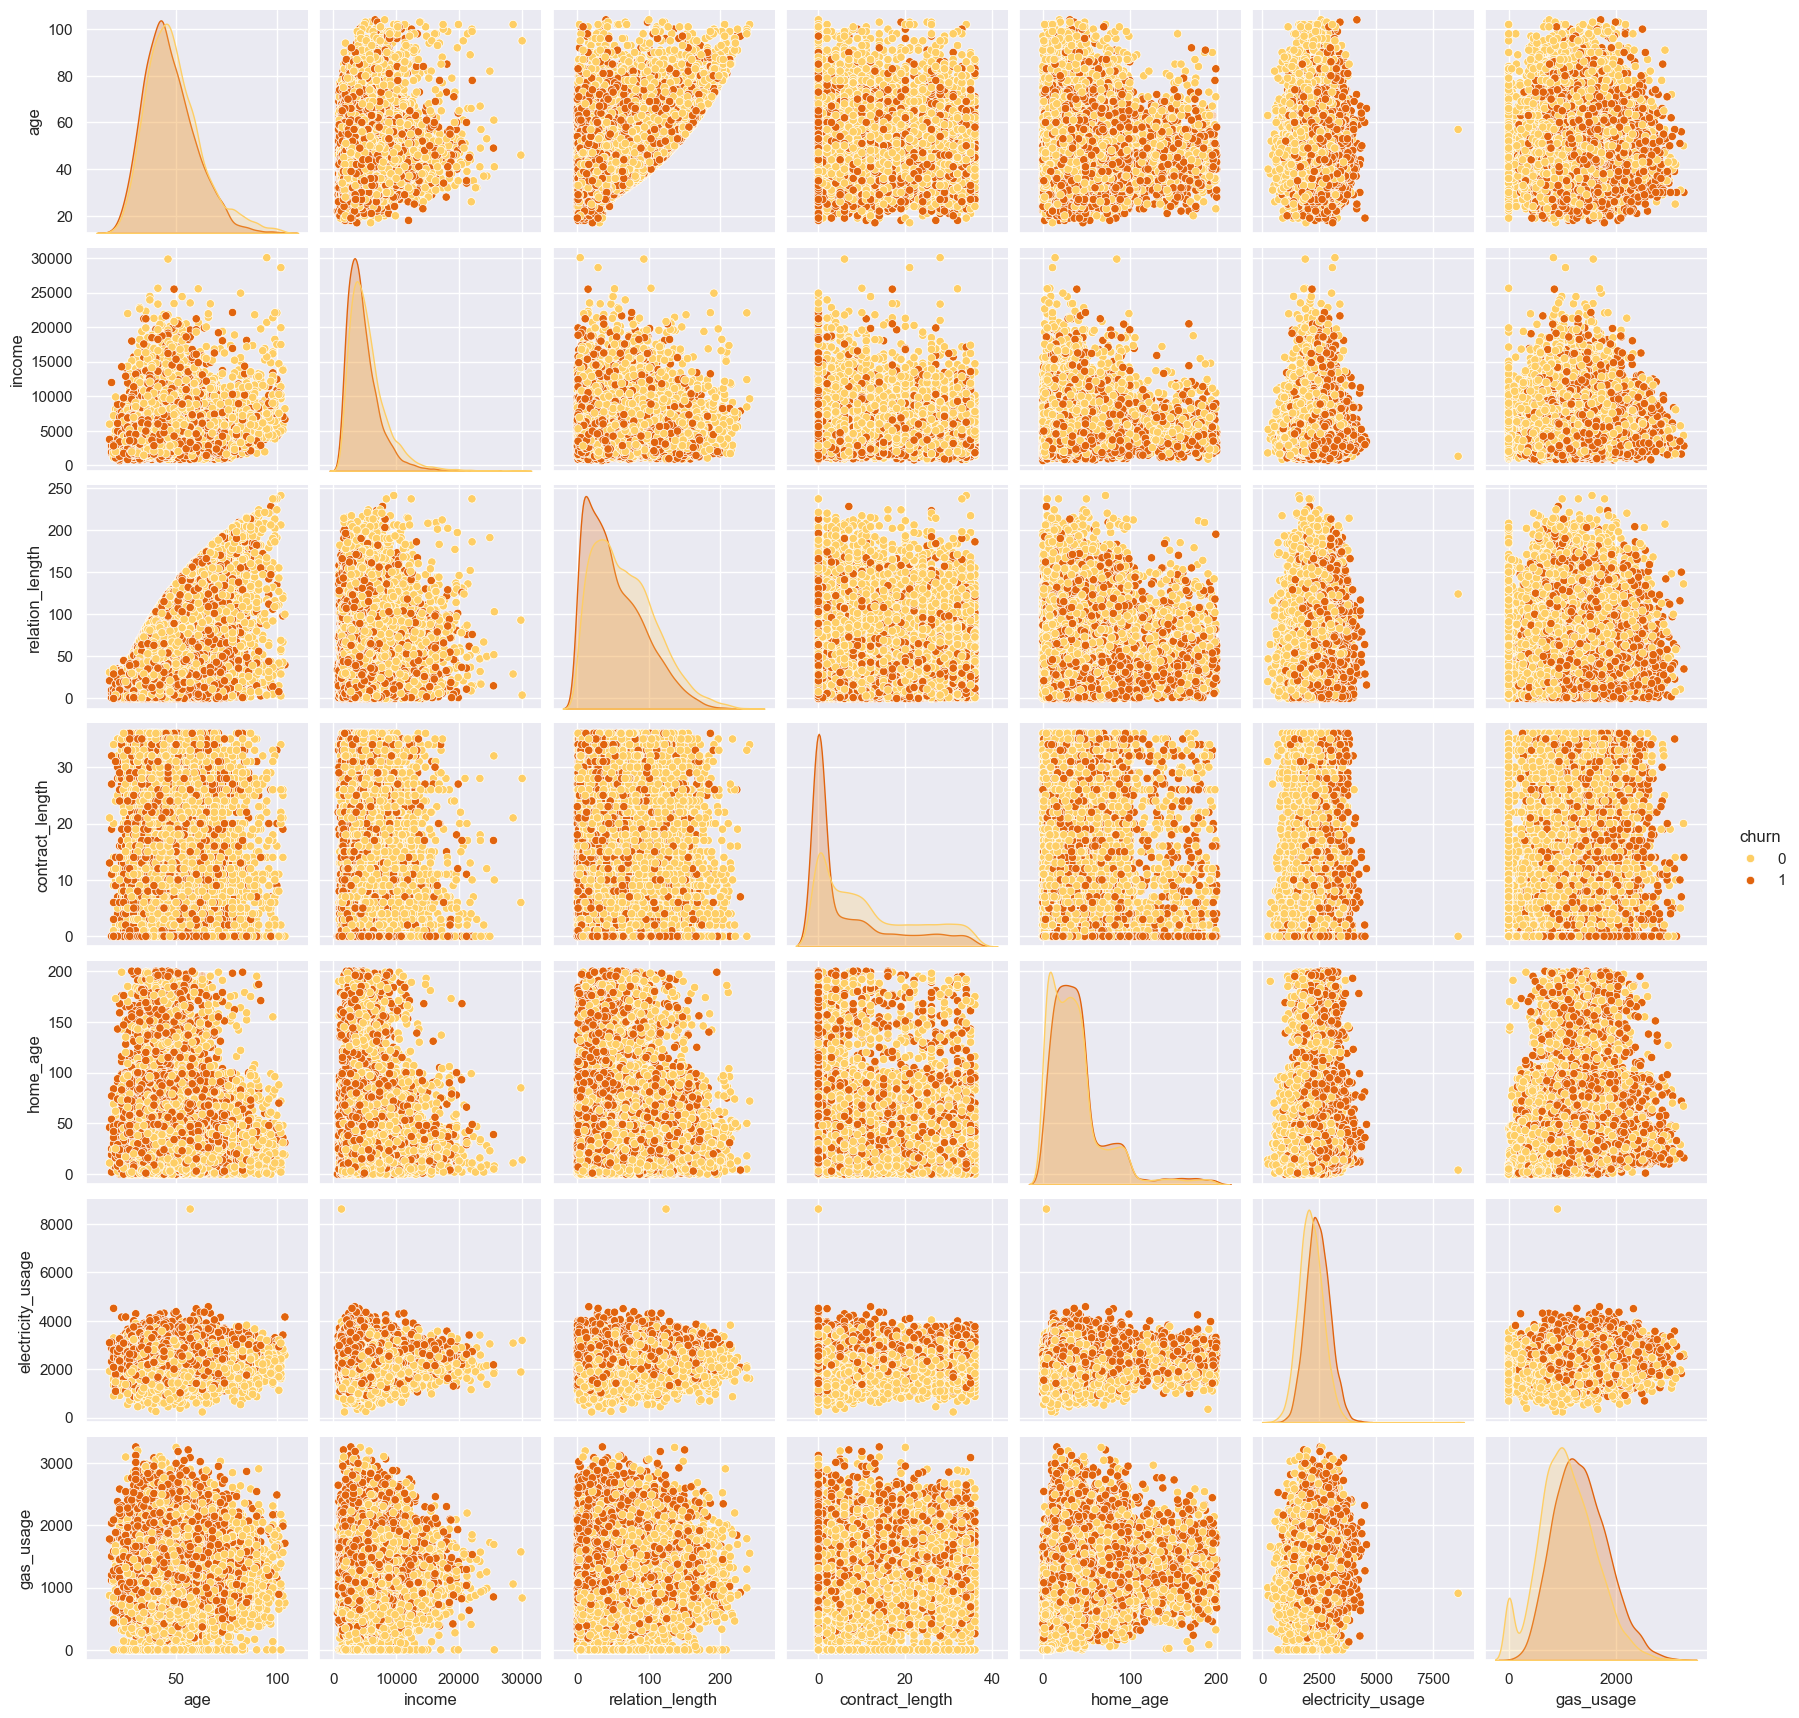

In [61]:
sns.pairplot(energy_supplier.drop(columns=['customer_id']), hue='churn', palette='YlOrBr')

Although quite a bit of information is presented, a few things caught my eye: 
- age and relationship length seem to be positively correlated 
- contract's lenght histogram has a large number of ocurrences close to 0 
- home's age histogram has three distinct level drops 
A deeper dive will be done into these variables

In [ ]:
corr = energy_supplier.drop(columns=['customer_id']).corr(method = 'pearson').sort_values(by = 'churn', axis = 0, ascending = False).sort_values(by = 'churn', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.color_palette("YlOrBr", as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:8,0:8], mask=mask[0:8,0:8], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In this correlation heatmap: 
- Slight positive correlation between electricity and gas usage with churn 
- Slight negative correlation between income, relationship lenght and contract length with churn 
- Positive correlation between gas and electricity usage 
- Positive correlation between gas usage and home age
- Positive correlation between age and relationship length, as we had expected from the previuous graph

Text(0, 0.5, 'Relationship Length')

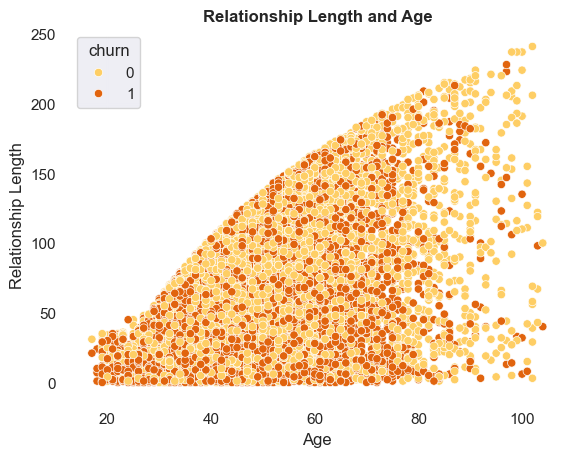

In [100]:
sns.scatterplot(energy_supplier, x='age', y='relation_length',  palette='YlOrBr', hue= 'churn')
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
plt.gca().set_facecolor('none')#set boxplot background to be transparent
plt.title('Relationship Length and Age', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Relationship Length')

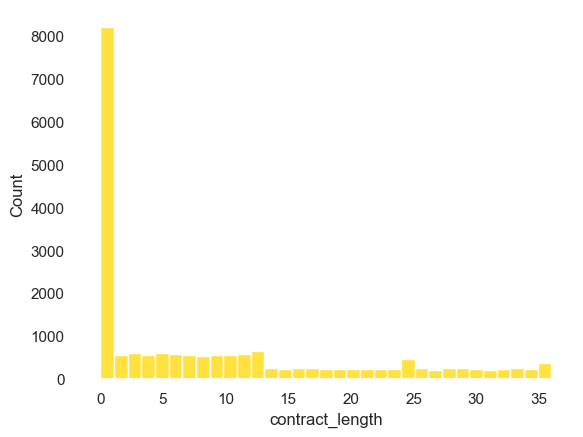

In [91]:
sns.histplot(energy_supplier['contract_length'], color='#FFD700')
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
plt.gca().set_facecolor('none')#set boxplot background to be transparent
plt.title('Contract Length Histogram', fontweight='bold')
plt.xlabel('Contract Length')

Due to the large number of 0s in this variable, we create a new binary variable 'contract' to determine the possible effect of switching costs

In [102]:
energy_supplier['contract'] = np.where(energy_supplier['contract_length'] > 0, 
                                       1,
                                       0)

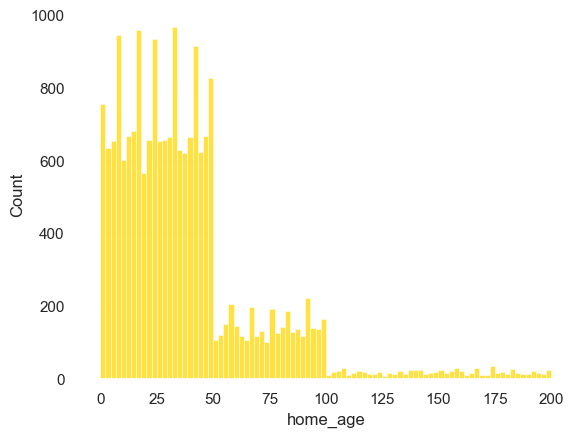

In [92]:
sns.histplot(energy_supplier['home_age'], color='#FFD700')
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
plt.gca().set_facecolor('none')#set boxplot background to be transparent
plt.title('Home Age Histogram', fontweight='bold')
plt.xlabel('Home Age')

Here we can also see three distinct levels at home's age, from 0 to 50 years old, 50 to 100 and 100 years and older. We turn this variable categorical. 

In [ ]:
#we define a function to categorize home's age 
def home_age_category(age):
    if age <= 50:
        return '0-50'
    elif age <= 100:
        return '50-100'
    else:
        return '100+'

#we apply the function 
energy_supplier['home_age'] = energy_supplier['home_age'].apply(home_age_category)

#and we turn the variable categorical 
energy_supplier['home_age'] = pd.Categorical(energy_supplier['home_age'])

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_11987/1623687671.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='home_label', y='home_age', data=energy_supplier,  palette='YlOrBr')


Text(0, 0.5, 'Home Age')

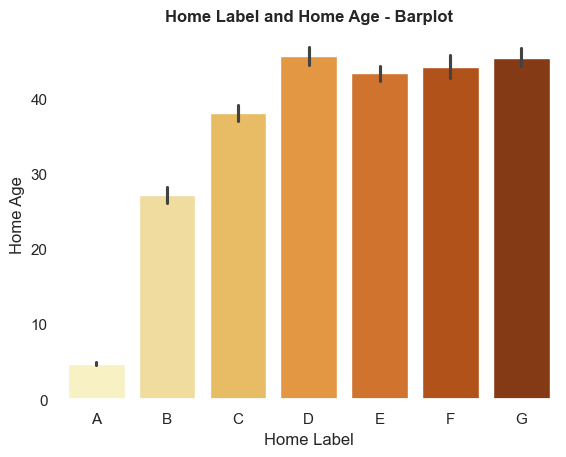

In [101]:
sns.barplot(x='home_label', y='home_age', data=energy_supplier,  palette='YlOrBr')
sns.set(rc={'figure.facecolor':'none'}) #set figure background to be transparent
plt.gca().set_facecolor('none')#set boxplot background to be transparent
plt.title('Home Label and Home Age - Barplot', fontweight='bold')
plt.xlabel('Home Label')
plt.ylabel('Home Age')